Cargamos librerías

In [14]:
import pandas as pd
import numpy as np
import lightgbm as lgb  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Se carga el dataset

In [15]:
data_exo = r"C:\Users\CixoY\OneDrive\Desktop\Exoplanetas detecccion\exoplanetas_combinados_train.csv"
df = pd.read_csv(data_exo)
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,1.000176,0.999964,1.000146,1.000112,1.000024,1.000059,1.000027,0.999952,0.999913,...,0.999865,0.999782,0.999979,1.000235,1.000156,0.999890,1.000002,0.999998,1.000151,1.000154
1,2,0.999675,0.999814,0.999367,1.000301,0.999913,1.000183,0.999960,0.999851,1.000383,...,0.999703,1.000882,0.999350,0.999836,0.999704,1.000098,0.999782,1.000043,0.999815,0.999970
2,2,1.000537,1.000355,1.000402,1.000192,1.000264,1.000134,1.000360,1.000372,1.000411,...,0.999660,0.999821,1.000317,0.999762,0.999778,1.000249,1.000177,0.999983,0.999972,1.000319
3,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,2,0.999737,0.999990,1.000060,0.999875,1.000010,1.000556,1.000544,1.000613,0.999580,...,1.000661,1.001305,0.999687,0.999780,0.999806,0.999756,0.999995,1.000226,0.999681,0.999919


Información general

In [16]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5224 entries, 0 to 5223
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 127.5 MB


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5224.000000,5.224000e+03,5.224000e+03,5.224000e+03,5.224000e+03,5.224000e+03,5.224000e+03,5.224000e+03,5.224000e+03,5.224000e+03,...,5.223000e+03,5.223000e+03,5.223000e+03,5.223000e+03,5.223000e+03,5.223000e+03,5223.000000,5223.000000,5223.000000,5223.000000
mean,1.033308,1.407420e+02,1.252321e+02,1.433024e+02,1.520823e+02,1.520789e+02,1.431366e+02,1.138002e+02,1.115218e+02,1.196680e+02,...,3.395078e+02,4.827676e+02,6.536721e+02,7.274573e+02,6.756993e+02,6.382660e+02,-481.875381,-530.387710,-428.749818,-292.684792
std,0.179456,2.122276e+04,2.150941e+04,2.162380e+04,2.194014e+04,2.277973e+04,2.378743e+04,2.382238e+04,2.260449e+04,2.074922e+04,...,2.827240e+04,3.505328e+04,4.292958e+04,4.916095e+04,5.020435e+04,5.269994e+04,17610.745926,17490.255423,16060.252509,14270.341187
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-3.984750e+01,-3.699750e+01,-3.617000e+01,-3.312500e+01,-2.977000e+01,-3.086750e+01,-2.629250e+01,-2.566250e+01,-2.530250e+01,...,-1.610500e+01,-1.831000e+01,-1.632500e+01,-1.929000e+01,-2.088500e+01,-2.217000e+01,-24.850000,-22.705000,-19.895000,-18.610000
50%,1.000000,1.600000e-01,2.050000e-01,1.100000e-01,4.600000e-01,1.400000e-01,-2.900000e-01,-9.500000e-02,-3.500000e-02,1.550000e-01,...,1.840000e+00,2.090000e+00,2.420000e+00,2.760000e+00,2.260000e+00,2.550000e+00,-0.090000,0.998921,0.999956,1.000289
75%,1.000000,4.500000e+01,4.103000e+01,3.949500e+01,3.779750e+01,3.759750e+01,3.299500e+01,3.191000e+01,2.975000e+01,2.856750e+01,...,2.099000e+01,2.136500e+01,2.470500e+01,2.748000e+01,2.656000e+01,2.951500e+01,17.210000,17.630000,18.395000,19.235000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [17]:
df['LABEL'].value_counts()

LABEL
1    5050
2     174
Name: count, dtype: int64

Elección datos predictores y por predecir

In [18]:
#definimos variables predictora y la que se predecira
X = df.drop("LABEL", axis=1)
y = df["LABEL"]

In [19]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.7, random_state=42,stratify=y)

Normalizacion

In [20]:
escala = MinMaxScaler(feature_range=(0, 1))
escala.fit(X_entrena)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [21]:
X_entrena_norm = escala.transform(X_entrena)
X_prueba_norm = escala.transform(X_prueba)

Creamos modelo GBM

In [22]:
print("\nEntrenando LightGBM (con manejo de desbalance)...")
# Proporción para 'scale_pos_weight'
conteo = y_entrena.value_counts()
proporcion = conteo[1] / conteo[2] # 5050 / 174 ≈ 29

clf_lgbm = lgb.LGBMClassifier(
    random_state=42,scale_pos_weight=proporcion)
clf_lgbm.fit(X_entrena, y_entrena)


Entrenando LightGBM (con manejo de desbalance)...
[LightGBM] [Info] Number of positive: 122, number of negative: 3534
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.224841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 815235
[LightGBM] [Info] Number of data points in the train set: 3656, number of used features: 3197
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033370 -> initscore=-3.366165
[LightGBM] [Info] Start training from score -3.366165
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


Metricas

Evaluando modelo...

--- Reporte de Clasificación (Métricas Reales) ---
                    precision    recall  f1-score   support

Label 1 (Estrella)       0.99      1.00      1.00      1516
 Label 2 (Planeta)       1.00      0.83      0.91        52

          accuracy                           0.99      1568
         macro avg       1.00      0.91      0.95      1568
      weighted avg       0.99      0.99      0.99      1568


--- Matriz de Confusión ---


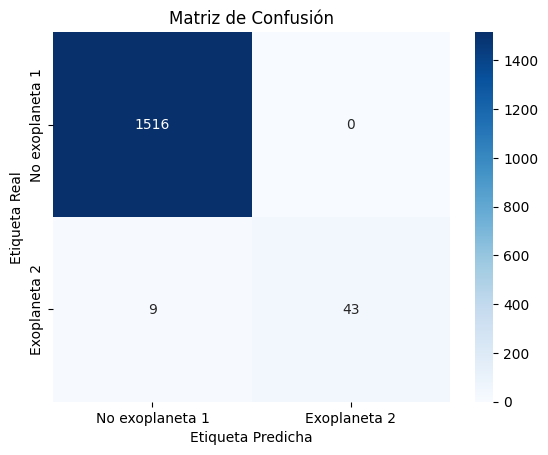

In [23]:
print("Evaluando modelo...")
y_pred = clf_lgbm.predict(X_prueba) # Usa clf_lgbm o clf_rf

# ¡No uses accuracy! Usa el reporte de clasificación
print("\n--- Reporte de Clasificación (Métricas Reales) ---")
# 'target_names' hace el reporte más fácil de leer
print(classification_report(y_prueba, y_pred, target_names=['Label 1 (Estrella)', 'Label 2 (Planeta)']))


print("\n--- Matriz de Confusión ---")
# Esto te muestra los Falsos Negativos y Falsos Positivos
cm = confusion_matrix(y_prueba, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No exoplaneta 1', 'Exoplaneta 2'], yticklabels=['No exoplaneta 1', 'Exoplaneta 2'])
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.title('Matriz de Confusión')
plt.show()

Gráficos


Mostrando ejemplo de curvas de luz:


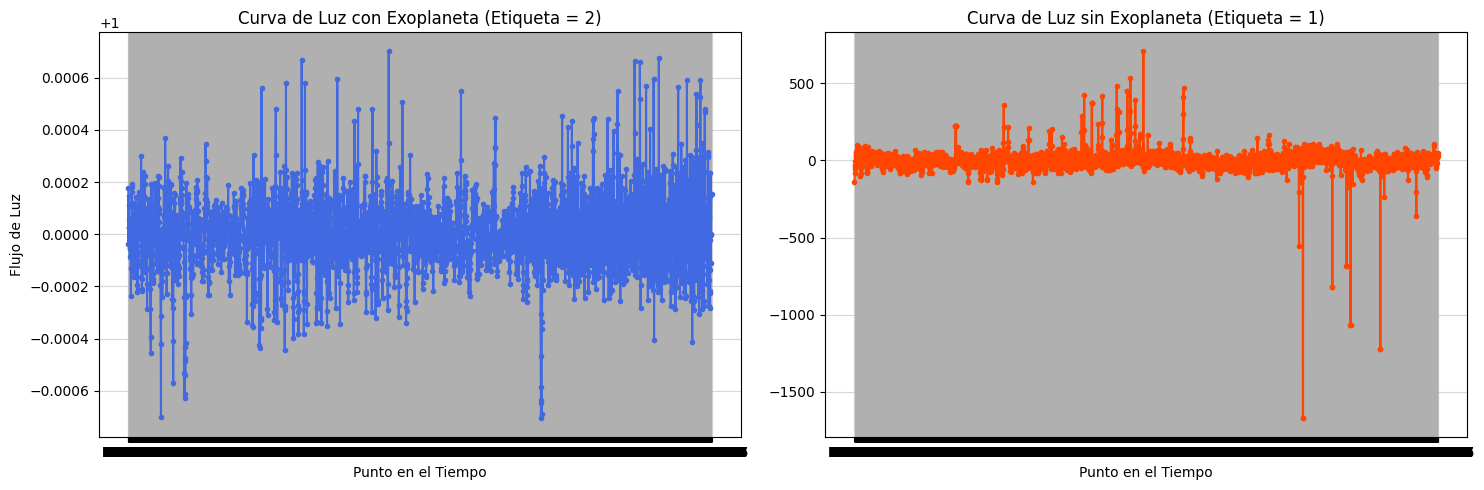

In [24]:
# Gráfica 1: Curvas de Luz
print("\nMostrando ejemplo de curvas de luz:")
curva_exoplaneta = df[df['LABEL']==2].iloc[0].drop('LABEL')
curva_no_exoplaneta = df[df['LABEL']==1].iloc[0].drop('LABEL')
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(curva_exoplaneta, '.-', color='royalblue')
plt.title('Curva de Luz con Exoplaneta (Etiqueta = 2)')
plt.xlabel('Punto en el Tiempo'); plt.ylabel('Flujo de Luz'); plt.grid(True, alpha=0.5)
plt.subplot(1, 2, 2)
plt.plot(curva_no_exoplaneta, '.-', color='orangered')
plt.title('Curva de Luz sin Exoplaneta (Etiqueta = 1)')
plt.xlabel('Punto en el Tiempo'); plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

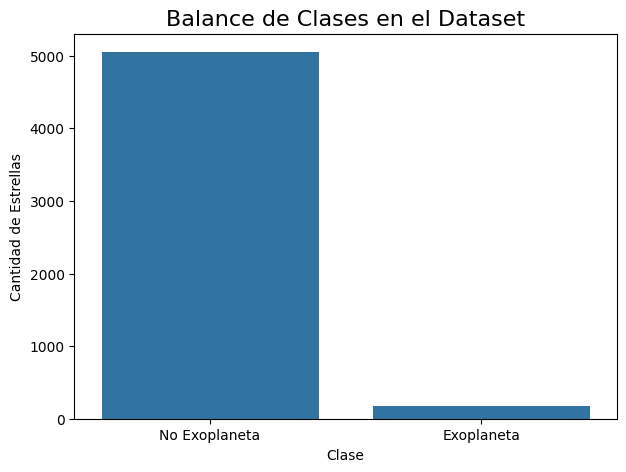

In [25]:
plt.figure(figsize=(7, 5))
sns.countplot(x=df['LABEL'])
plt.title('Balance de Clases en el Dataset', fontsize=16)
plt.xticks([0, 1], ['No Exoplaneta', 'Exoplaneta'])
plt.ylabel('Cantidad de Estrellas')
plt.xlabel('Clase')
plt.show()